[datacamp link](https://www.datacamp.com/courses/machine-translation-in-python)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow.keras as keras
from tensorflow.python.keras.utils import to_categorical
from tensorflow.keras.layers import Input, RepeatVector
from tensorflow.keras.layers import Dense, TimeDistributed
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics.pairwise import cosine_similarity

**Course Description**

The need to pack a bilingual dictionary for your European holiday or keeping one on your desk to complete your foreign language homework is a thing of the past. You just hop on the internet and make use of a language translation service to quickly understand what the street sign means or finding out how to greet and thank a foreigner in their language. Behind the language translation services are complex machine translation models. Have you ever wondered how these models work? This course will allow you to explore the inner workings of a machine translation model. You will use Keras, a powerful Python-based deep learning library, to implement a translation model. You will then train the model to perform an English to French translation, and you will be shown techniques to improve your model. At the end of this course, you would have developed an in-depth understanding of machine translation models and appreciate them even more!

## 1. Introduction to machine translation

In this chapter, you'll understand what the encoder-decoder architecture is and how it is used for machine translation. You will also learn about Gated Recurrent Units (GRUs) and how they are used in the encoder-decoder architecture.

### Introduction to machine translation




#### Understanding one-hot vectors


In [0]:
word2index = {'I': 0, 'cats': 2, 'like': 1}

- Create a list of words I, like, cats and convert each word to an integer using `word2index`. Print the resulting integers.

In [0]:
from tensorflow.python.keras.utils import to_categorical

# Create a list of words and convert them to indices
words = ["I", "like", "cats"]
word_ids = [word2index[w] for w in words]
print(word_ids)

[0, 1, 2]


- Convert the words to one-hot vectors using the Keras `to_categorical()` function.

In [0]:
# Create onehot vectors using to_categorical function
onehot_1 = to_categorical(word_ids)

- Print the words and their corresponding one-hot vectors using the `zip()` function.


In [0]:
# Print words and their corresponding onehot vectors
print([(w,ohe.tolist()) for w,ohe in zip(words, onehot_1)])

[('I', [1.0, 0.0, 0.0]), ('like', [0.0, 1.0, 0.0]), ('cats', [0.0, 0.0, 1.0])]


- Convert words to one-hot vectors using the number of classes as 5, assign it to the variable `onehot_2` and print the result.

In [0]:
# Create onehot vectors with a fixed number of classes
onehot_2 = to_categorical(word_ids, num_classes=5)
print([(w,ohe.tolist()) for w,ohe in zip(words, onehot_2)])

[('I', [1.0, 0.0, 0.0, 0.0, 0.0]), ('like', [0.0, 1.0, 0.0, 0.0, 0.0]), ('cats', [0.0, 0.0, 1.0, 0.0, 0.0])]


#### Exploring the `to_categorical()` function

In part 1, you will implement the function `compute_onehot_length()` that generates one-hot vectors for a given list of words and computes the length of those vectors.

In [0]:
def compute_onehot_length(words, word2index):
  # Create word IDs for words
  word_ids = [word2index[w] for w in words]
  # Convert word IDs to onehot vectors
  onehot = to_categorical(word_ids)
  # Return the length of a single one-hot vector
  return onehot.shape[1]

In [0]:
word2index = {"He":0, "drank": 1, "milk": 2}
# Compute and print onehot length of a list of words
print(compute_onehot_length(["He", "drank", "milk"], word2index))

3


The `num_classes` argument controls the length of the one-hot encoded vectors produced by the `to_categorical()` function. You will see that in situations where you have two different corpora (i.e. collections of texts) with different vocabularies, leaving the `num_classes` undefined can result in one-hot vectors of varying length.

In [0]:
word2index = {'He': 6,
 'I': 0,
 'We': 3,
 'cats': 2,
 'dogs': 5,
 'hates': 7,
 'like': 4,
 'rabbits': 8}

In [0]:
words_1 = ["I", "like", "cats", "We", "like", "dogs", "He", "hates", "rabbits"]
# Call compute_onehot_length on words_1
length_1 = compute_onehot_length(words_1, word2index)

In [0]:
words_2 = ["I", "like", "cats", "We", "like", "dogs", "We", "like", "cats"]
# Call compute_onehot_length on words_2
length_2 = compute_onehot_length(words_2, word2index)

In [0]:
# Print length_1 and length_2
print("length_1 =>", length_1, " and length_2 => ", length_2)

length_1 => 9  and length_2 =>  6


### Encoder decoder architecture


#### Text reversing model - Encoder

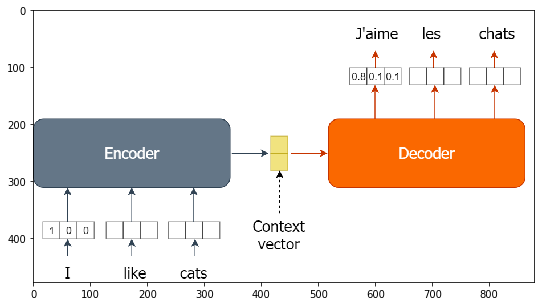

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('12_encoder_decoder_2.png')
fig= plt.figure(figsize=(10,5))
plt.imshow(img)

The `words2onehot()` function should take in a list of words and a dictionary `word2index` and convert the list of words to an array of one-hot vectors.

In [0]:
word2index = {'I': 0, 'cats': 2, 'like': 1}

In [0]:
import numpy as np

def words2onehot(word_list, word2index):
  # Convert words to word IDs
  word_ids = [word2index[w] for w in word_list]
  # Convert word IDs to onehot vectors and return the onehot array
  onehot = to_categorical(word_ids, num_classes=3)
  return onehot

In [0]:
words = ["I", "like", "cats"]
# Convert words to onehot vectors using words2onehot
onehot = words2onehot(words, word2index)
# Print the result as (<word>, <onehot>) tuples
print([(w,ohe.tolist()) for w,ohe in zip(words, onehot)])

[('I', [1.0, 0.0, 0.0]), ('like', [0.0, 1.0, 0.0]), ('cats', [0.0, 0.0, 1.0])]


Here you will be implementing the `encoder()` function. 

The `encoder()` function takes in a set of one-hot vectors and converts them to a list of word ids.

In [0]:
def encoder(onehot):
  # Get word IDs from onehot vectors and return the IDs
  word_ids = np.argmax(onehot, axis=1)
  return word_ids

In [0]:
word2index = {'We': 0, 'dogs': 2, 'like': 1}

In [0]:
# Define "we like dogs" as words
words = ["We", "like", "dogs"]
# Convert words to onehot vectors using words2onehot
onehot = words2onehot(words, word2index)
# Get the context vector by using the encoder function
context = encoder(onehot)
print(context)

[0 1 2]


#### Complete text reversing model


In [0]:
index2word = {0: 'We', 1: 'like', 2: 'dogs'}

- Define the `onehot2words()` function, which obtains word IDs from one-hot vectors and then convert the IDs to words.

In [0]:
# Define the onehot2words function that returns words for a set of onehot vectors
def onehot2words(onehot, index2word):
  ids = np.argmax(onehot, axis=1)
  res = [index2word[id] for id in ids]
  return res

- Define the `decoder()` function which reverses the word IDs in the context vector and produce one-hot vectors from reversed word IDs.

In [0]:
# Define the decoder function that returns reversed onehot vectors
def decoder(context_vector):
  word_ids_rev = context_vector[::-1]
  onehot_rev = to_categorical(word_ids_rev, num_classes=3)
  return onehot_rev

- Get the one-hot vectors of the reversed word IDs using the `decoder()` function.

In [0]:
# Convert context to reversed onehot vectors using decoder
onehot_rev = decoder(context)

- Get the reversed words from the one-hot vectors using the `onehot2words()` function.

In [0]:
# Get the reversed words using the onehot2words function
reversed_words = onehot2words(onehot_rev, index2word)
print(reversed_words)

['dogs', 'like', 'We']


### Understanding sequential models


#### Understanding GRU models

- Define a Keras input layer with batch size 2, sequence length 3 and input dimensionality 4. 

Remember that you can define an input layer using the `keras.layers.Input(<argument>=<value>)` syntax.

In [0]:
import tensorflow.keras as keras
import numpy as np
# Define an input layer
inp = keras.layers.Input(batch_shape=(2,3,4))

- Define a Keras GRU layer that has 10 hidden units and feeds on the previous input layer. 

You can use the `keras.layers.GRU(<parameter>)` to define a GRU layer.

In [0]:
# Define a GRU layer that takes in the input
gru_out = keras.layers.GRU(10)(inp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


- Define a Keras model called model where the input is the input layer and the output is the output of the GRU layer.

In [0]:
# Define a model that outputs the GRU output
model = keras.models.Model(inputs=inp, outputs=gru_out)
# batch size*sequence length*input dimensionality
x = np.random.normal(size=(2,3,4))
# Get the output of the model and print the result
y = model.predict(x)
print("shape (y) =", y.shape, "\ny = \n", y)

shape (y) = (2, 10) 
y = 
 [[ 0.01867355 -0.06034218  0.34620747  0.07195392  0.35603932 -0.16428785
   0.31989816 -0.05256429  0.4084206   0.33694518]
 [ 0.1618832  -0.44526684 -0.68581486 -0.41020092 -0.18813774 -0.21779475
  -0.44571614 -0.38682953  0.4116805  -0.20242918]]


- Define an input layer that accepts arbitrary sized batch of data having sequence length 3 and input size 4.
- Define a GRU layer with 10 hidden units that consumes the previous input and produces an output.
- Define a Model called model that takes the input layer as the input and produces the output of the GRU layer as the output. Remember that you can use the `keras.models.Model(<argument>=<value>)` syntax to define a model.
- Predict the model output for both x1 and x2.

In [0]:
# Define an input layer
inp = keras.layers.Input(shape=(3,4))
# Define a GRU layer that takes in the input
gru_out = keras.layers.GRU(10)(inp)
# Define a model that outputs the GRU output
model = keras.models.Model(inputs=inp, outputs=gru_out)

x1 = np.random.normal(size=(2,3,4))
x2 = np.random.normal(size=(5,3,4))

# Get the output of the model and print the result
y1 = model.predict(x1)
y2 = model.predict(x2)
print("shape (y1) = ", y1.shape, " shape (y2) = ", y2.shape)

shape (y1) =  (2, 10)  shape (y2) =  (5, 10)


#### Understanding sequential model output

- Create an Input layer of batch size 3, 20 time steps and 5 dimensions and call it inp.
- Create a GRU layer of hidden size 10, pass the inp to this layer and print the shape of the output.

In [0]:
# Define the Input layer
inp = keras.layers.Input(batch_shape=(3,20,5)) # batch size*time steps*dimensions
# Define a GRU layer that takes in inp as the input
gru_out1 = keras.layers.GRU(10)(inp)
print("gru_out1.shape = ", gru_out1.shape)

gru_out1.shape =  (3, 10)


- Create a new `GRU` layer with 10 hidden units, which returns the state and pass in `inp` as the input, assign the state to the `gru_state`, and print the shape of `gru_out2` and `gru_state`.

In [0]:
# Define the second GRU and print the shape of the outputs
gru_out2, gru_state = keras.layers.GRU(10, return_state=True)(inp)
print("gru_out2.shape = ", gru_out2.shape)
print("gru_state.shape = ", gru_state.shape)

gru_out2.shape =  (3, 10)
gru_state.shape =  (3, 10)


- Create a new `GRU` layer with `return_sequences=True`, pass in `inp` as the input, and print the shape of the output.

In [0]:
# Define the third GRU layer which will return all the outputs
gru_out3 = keras.layers.GRU(10, return_sequences=True)(inp)
print("gru_out3.shape = ", gru_out3.shape)

gru_out3.shape =  (3, 20, 10)


## 2. Implementing an encoder decoder model with Keras

In this chapter, you will implement the encoder-decoder model with the Keras functional API. While doing so, you will learn several useful Keras layers such as `RepeatVector` and `TimeDistributed layers`.

### Implementing the encoder


In [0]:
# load text file into a list
text_file = open("vocab_en.txt", "r")
en_text = text_file.read().split('\n')
text_file.close()

In [0]:
en_text[0]

'new jersey is sometimes quiet during autumn , and it is snowy in april .'

In [0]:
text_file = open("vocab_fr.txt", "r")
fr_text = text_file.read().split('\n')
text_file.close()

In [0]:
fr_text[0]

"new jersey est parfois calme pendant l' automne , et il est neigeux en avril ."

- Write a `zip()` function that iterates through the first 5 sentences of the English sentences (`en_text`) and French sentences (`fr_text`).



In [0]:
# Iterate through the first 5 English and French sentences in the dataset
for en_sent, fr_sent in zip(en_text[:5], fr_text[:5]):  
  print("English: ", en_sent)
  print("\tFrench: ", fr_sent)

English:  new jersey is sometimes quiet during autumn , and it is snowy in april .
	French:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
English:  the united states is usually chilly during july , and it is usually freezing in november .
	French:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .
English:  california is usually quiet during march , and it is usually hot in june .
	French:  california est généralement calme en mars , et il est généralement chaud en juin .
English:  the united states is sometimes mild during june , and it is cold in september .
	French:  les états-unis est parfois légère en juin , et il fait froid en septembre .
English:  your least liked fruit is the grape , but my least liked is the apple .
	French:  votre moins aimé fruit est le raisin , mais mon moins aimé est la pomme .


- Get the first English sentence from `en_text`.

In [0]:
# Get the first sentence of the English dataset
first_sent = en_text[0]
print("First sentence: ", first_sent)

First sentence:  new jersey is sometimes quiet during autumn , and it is snowy in april .


- Tokenize the obtained sentence using the `split()` function and the space character and assign it to `first_words`.
- Print the tokenized words.

In [0]:
# Tokenize the first sentence
first_words = first_sent.split(" ")
# Print the tokenized words
print("\tWords: ", first_words)

	Words:  ['new', 'jersey', 'is', 'sometimes', 'quiet', 'during', 'autumn', ',', 'and', 'it', 'is', 'snowy', 'in', 'april', '.']


For this exercise, the English dataset en_text containing a list of English sentences has been provided. In this exercise you will be using a Python list-related function called `<list>.extend()` which is a different variant of the function `<list>.append()`. 

- Compute the lengths of each sentence using the `split()` function and the `len()` function, while iterating through `en_text`.
- Compute the mean length of sentences using `numpy`.

In [0]:
# Compute length of sentences
sent_lengths = [len(en_sent.split(" ")) for en_sent in en_text]
# Compute the mean of sentences lengths
mean_length = np.mean(sent_lengths)
print('(English) Mean sentence length: ', mean_length)

(English) Mean sentence length:  13.225589543090503


- Populate the list all_words, in the for loop body, by adding in all the words found in sentences after tokenizing.
- Convert the list all_words, to a set object and compute the length/size of the set.

In [0]:
all_words = []
for sent in en_text:
  # Populate all_words with all the words in sentences
  all_words.extend(sent.split(" "))
# Compute the length of the set containing all_words
vocab_size = len(set(all_words))
print("(English) Vocabulary size: ", vocab_size)

(English) Vocabulary size:  228


#### Defining the encoder
The encoder that you will implement is a very simple model compared to the complex models that are used in real-world applications such as the Google machine translation service. 

In [0]:
import tensorflow.keras as keras

en_len = 15
en_vocab = 150
hsize = 48

# Define an input layer
en_inputs = keras.layers.Input(shape=(en_len, en_vocab))
# Define a GRU layer which returns the state
en_gru = keras.layers.GRU(hsize, return_state=True)
# Get the output and state from the GRU
en_out, en_state = en_gru(en_inputs)
# Define and print the model summary
encoder = keras.models.Model(inputs=en_inputs, outputs=en_state)
print(encoder.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 15, 150)]         0         
_________________________________________________________________
gru_5 (GRU)                  [(None, 48), (None, 48)]  28656     
Total params: 28,656
Trainable params: 28,656
Non-trainable params: 0
_________________________________________________________________
None


### Implementing the decoder


#### Understanding the RepeatVector layer

The `RepeatVector` layer adds an extra dimension to your dataset. 

For example if you have an input of shape `(batch size, input size)` and you want to feed that to a `GRU` layer, you can use a `RepeatVector` layer to convert the input to a tensor with shape `(batch size, sequence length, input size)`.

In [0]:
from tensorflow.keras.layers import Input, RepeatVector
from tensorflow.keras.models import Model
import numpy as np

inp = Input(shape=(2,))
# Define a RepeatVector that repeats the input 6 times
rep = RepeatVector(6)(inp)
# Define a model
model = Model(inputs=inp, outputs=rep)
# Define input x
x = np.array([[0,1],[2,3]])
# Get model prediction y
y = model.predict(x)
print('x.shape = ',x.shape,'\ny.shape = ',y.shape)

x.shape =  (2, 2) 
y.shape =  (2, 6, 2)


#### Defining the decoder

The decoder uses the same model as the encoder. 

However there are differences in the inputs and states fed to the decoder, compared to the encoder. 

For example, the decoder consumes the context vector produced by the encoder as inputs as well as the initial state to the decoder.

In [0]:
from tensorflow.keras.layers import GRU
# from keras.layers import GRU # it's different from tensorflow.keras

In [0]:
from tensorflow.keras.layers import RepeatVector

hsize = 48
fr_len = 20
# Define a RepeatVector layer
de_inputs = RepeatVector(fr_len)(en_state)
# Define a GRU model that returns all outputs
decoder_gru = GRU(hsize, return_sequences=True)
# Get the outputs of the decoder
gru_outputs = decoder_gru(de_inputs, initial_state=en_state)
# Define a model with the correct inputs and outputs
enc_dec = Model(inputs=en_inputs, outputs=gru_outputs)
enc_dec.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 15, 150)]    0                                            
__________________________________________________________________________________________________
gru_5 (GRU)                     [(None, 48), (None,  28656       input_4[0][0]                    
__________________________________________________________________________________________________
repeat_vector_4 (RepeatVector)  (None, 20, 48)       0           gru_5[0][1]                      
__________________________________________________________________________________________________
gru_6 (GRU)                     (None, 20, 48)       13968       repeat_vector_4[0][0]            
                                                                 gru_5[0][1]                

### Dense and TimeDistributed layers


#### Enter to win amazing prizes

Imagine there's a game show where prizes are determined by a neural network. The contestant enters

- the number of siblings,
- the number of coffees had today and
- if they like tomatoes or not,

and the model predicts what the contestant will win.

To implement this, you will be using `Keras`. You will need to create a model with an input layer which accepts three features (the number of siblings as an integer, the number of coffees as an integer and if they like tomatoes or not as a 0 or 1). Then the input goes through a Dense layer which outputs 3 probabilities (i.e. probabilities of winning a car, a gift voucher or nothing).

In [0]:
# pre-loaded
from tensorflow.python.keras.initializers import RandomNormal
init = RandomNormal()
init

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# Define an input layer with batch size 3 and input size 3
inp = Input(batch_shape=(3, 3))
# Get the output of the 3 node Dense layer
pred = Dense(3, activation='softmax', kernel_initializer=init, bias_initializer=init)(inp)
model = Model(inputs=inp, outputs=pred)

names = ["Mark", "John", "Kelly"]
prizes = ["Gift voucher", "Car", "Nothing"]
x = np.array([[5, 0, 1], [0, 3, 1], [2, 2, 1]])
# Compute the model prediction for x
y = model.predict(x)
# Get the most probable class for each sample
classes = np.argmax(y, axis=-1)
print("\n".join(["{} has probabilities {} and wins {}".format(n,p,prizes[c]) \
                 for n,p,c in zip(names, y, classes)]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Mark has probabilities [0.35032997 0.2268333  0.4228367 ] and wins Nothing
John has probabilities [0.38124028 0.3514808  0.26727897] and wins Gift voucher
Kelly has probabilities [0.3773006 0.3025755 0.3201239] and wins Gift voucher


This time, you will need to simulate multiple game shows hosted over several days. This means that your data will have a time dimension to it. More specifically, your data will have the `shape (number of contestants, game shows, inputs size)`.

You will need to extend your model to incorporate this new feature. For this you will be using a `TimeDistributed` layer to allow the Dense layer to accept contestants from multiple game shows.

You have been provided with the weight initializer `init`, the prizes list from the previous exercise, a time-series input `x` and names which contains the names of the contestants. `x` is a `(3,2,3)` numpy array where names is a `(2,3)` Python list. 

In other words, you have 2 game shows (i.e. sequence length), each with 3 contestants (batch size) where each contestant has 3 attributes (input size).

In [0]:
# pre-loaded weight initialiezer
from tensorflow.python.keras.initializers import RandomNormal
init = RandomNormal()
init

In [0]:
names = [['Mark', 'John', 'Kelly'], ['Jenny', 'Shan', 'Sarah']]

In [0]:
prizes = ['Gift voucher', 'Car', 'Nothing']

In [0]:
x = np.array([[[5, 0, 1],
        [1, 1, 0]],

       [[0, 3, 1],
        [0, 4, 0]],

       [[2, 2, 1],
        [6, 0, 1]]])
x

array([[[5, 0, 1],
        [1, 1, 0]],

       [[0, 3, 1],
        [0, 4, 0]],

       [[2, 2, 1],
        [6, 0, 1]]])

In [0]:
# Print names and x
print('names=\n',names, '\nx=\n',x, '\nx.shape=', x.shape)

names=
 [['Mark', 'John', 'Kelly'], ['Jenny', 'Shan', 'Sarah']] 
x=
 [[[5 0 1]
  [1 1 0]]

 [[0 3 1]
  [0 4 0]]

 [[2 2 1]
  [6 0 1]]] 
x.shape= (3, 2, 3)


- Create a `TimeDistributed` layer which wraps a 3 node `Dense` layer with softmax activation.
- Get the most probable classes for all the samples of the predictions.
- In the second `for` loop, provide the `t`th slice of `y` and classes (i.e. information of the `t`th game show).

In [0]:
inp = Input(shape=(2, 3))
# Create the TimeDistributed layer (the output of the Dense layer)
dense_time = TimeDistributed(Dense(3, activation='softmax', kernel_initializer=init, bias_initializer=init))
pred = dense_time(inp)
model = Model(inputs=inp, outputs=pred)

y = model.predict(x)
# Get the most probable class for each sample
classes = np.argmax(y, axis=-1)
for t in range(2):
  # Get the t-th time-dimension slice of y and classes
  for n, p, c in zip(names[t], y[:,t,:], classes[:,t]):
  	print("Game {}: {} has probs {} and wins {}\n".format(t+1,n,p,prizes[c]))

Game 1: Mark has probs [0.23264293 0.4425477  0.3248093 ] and wins Car

Game 1: John has probs [0.2933786  0.36400327 0.3426182 ] and wins Car

Game 1: Kelly has probs [0.26747108 0.39736548 0.33516338] and wins Car

Game 2: Jenny has probs [0.30025524 0.35210475 0.34763998] and wins Car

Game 2: Shan has probs [0.3024291  0.3636431  0.33392778] and wins Car

Game 2: Sarah has probs [0.21868774 0.46581194 0.31550026] and wins Car



Dimension:

In other words, you have 2 game shows (i.e. sequence length), each with 3 contestants (batch size) where each contestant has 3 attributes (input size).

### Implementing the full encoder decoder model


- encoder

In [0]:
import tensorflow.keras as keras

en_len = 20
en_vocab = 200
hsize = 64

# Define an input layer
en_inputs = keras.layers.Input(shape=(en_len, en_vocab))
# Define a GRU layer which returns the state
en_gru = keras.layers.GRU(hsize, return_state=True)
# Get the output and state from the GRU
en_out, en_state = en_gru(en_inputs)
# Define and print the model summary
encoder = keras.models.Model(inputs=en_inputs, outputs=en_state)
print(encoder.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 20, 200)]         0         
_________________________________________________________________
gru_8 (GRU)                  [(None, 64), (None, 64)]  50880     
Total params: 50,880
Trainable params: 50,880
Non-trainable params: 0
_________________________________________________________________
None


- decoder

In [0]:
from tensorflow.keras.layers import GRU
# from keras.layers import GRU # it's different from tensorflow.keras

In [0]:
from tensorflow.keras.layers import RepeatVector

hsize = 64
fr_len = 25
# Define a RepeatVector layer
de_inputs = RepeatVector(fr_len)(en_state)
# Define a GRU model that returns all outputs
decoder_gru = GRU(hsize, return_sequences=True)
# Get the outputs of the decoder
de_out = decoder_gru(de_inputs, initial_state=en_state)
# Define a model with the correct inputs and outputs
enc_dec = Model(inputs=en_inputs, outputs=de_out)
enc_dec.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 20, 200)]    0                                            
__________________________________________________________________________________________________
gru_8 (GRU)                     [(None, 64), (None,  50880       input_5[0][0]                    
__________________________________________________________________________________________________
repeat_vector_6 (RepeatVector)  (None, 25, 64)       0           gru_8[0][1]                      
__________________________________________________________________________________________________
gru_9 (GRU)                     (None, 25, 64)       24768       repeat_vector_6[0][0]            
                                                                 gru_8[0][1]                

In [0]:
de_out

<tf.Tensor 'gru_9/transpose_1:0' shape=(?, 25, 64) dtype=float32>

- GRU layer

... ready to implement...

In [0]:
from tensorflow.python.keras.layers.recurrent import GRU
GRU

tensorflow.python.keras.layers.recurrent.GRU

In [0]:
fr_vocab = 250

In [0]:
# Import Dense and TimeDistributed layers
from tensorflow.keras.layers import Dense, TimeDistributed
# Define a softmax dense layer that has fr_vocab outputs
de_dense = Dense(fr_vocab, activation='softmax')
# Wrap the dense layer in a TimeDistributed layer
de_dense_time = TimeDistributed(de_dense)
# Get the final prediction of the model
de_pred = de_dense_time(de_out)
print("Prediction shape: ", de_pred.shape)

Prediction shape:  (?, 25, 250)


#### Defining the full model

In [0]:
en_inputs

<tf.Tensor 'input_5:0' shape=(?, 20, 200) dtype=float32>

In [0]:
en_out # different from datacamp

<tf.Tensor 'gru_8/strided_slice_12:0' shape=(?, 64) dtype=float32>

In [0]:
en_state

<tf.Tensor 'gru_8/while/Exit_2:0' shape=(?, 64) dtype=float32>

In [0]:
de_pred

<tf.Tensor 'time_distributed_1/Reshape_1:0' shape=(?, 25, 250) dtype=float32>

In [0]:
from tensorflow.keras.models import Model
# Define a model with encoder input and decoder output
nmt = Model(inputs=en_inputs, outputs=de_pred)

# Compile the model with an optimizer and a loss
nmt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# View the summary of the model 
nmt.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 20, 200)]    0                                            
__________________________________________________________________________________________________
gru_8 (GRU)                     [(None, 64), (None,  50880       input_5[0][0]                    
__________________________________________________________________________________________________
repeat_vector_6 (RepeatVector)  (None, 25, 64)       0           gru_8[0][1]                      
__________________________________________________________________________________________________
gru_9 (GRU)                     (None, 25, 64)       24768       repeat_vector_6[0][0]            
                                                                 gru_8[0][1]                

## 3. Training and generating translations

In this chapter, you will train the previously defined model and then use a well-trained model to generate translations. You will see that our model does a good job when translating sentences.

### Part 1: Preprocessing the Data


#### Tokenizing sentences with Keras


In [0]:
# datacamp subsample the data
en_text = en_text[:10000]
len(en_text)

10000

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define a Keras Tokenizer
en_tok = Tokenizer()

# Fit the tokenizer on some text
en_tok.fit_on_texts(en_text)

for w in ["january", "apples", "summer"]:
  # Get the word ID of word w
  id = en_tok.word_index[w]
  # Print the word and the word ID
  print(w, " has id: ", id)

january  has id:  51
apples  has id:  80
summer  has id:  30


#### Controlling the vocabulary with the Tokenizer

In [0]:
# Convert the sentence to a word ID sequence
seq = en_tok.texts_to_sequences(['she likes grapefruit , peaches , and lemons .'])
print('Word ID sequence: ', seq)

# Define a tokenizer with vocabulary size 50 and oov_token 'UNK'
en_tok_new = Tokenizer(num_words=50, oov_token='UNK')

# Fit the tokenizer on en_text
en_tok_new.fit_on_texts(en_text)

# Convert the sentence to a word ID sequence
seq_new = en_tok_new.texts_to_sequences(['she likes grapefruit , peaches , and lemons .'])
print('Word ID sequence (with UNK): ', seq_new)
print('The ID 1 represents the word: ', en_tok_new.index_word[1])

Word ID sequence:  [[26, 70, 27, 73, 7, 74]]
Word ID sequence (with UNK):  [[27, 1, 28, 1, 8, 1]]
The ID 1 represents the word:  UNK


###Part 2: Preprocessing the Data


In [0]:
# datacamp subsample the data
fr_text = fr_text[:10]
len(fr_text)

10

In [0]:
fr_text[-1:]

['les états-unis est parfois occupé en janvier , et il est parfois chaud en novembre .']

In [0]:
fr_text_new = []

# Loop through all sentences in fr_text
for sent in (fr_text):
  
  print("Before adding tokens: ", sent)
  
  # Add sos and eos tokens
  sent_new = 'sos ' + sent + ' eos' # start token .. end token
  # Append the modified sentence to fr_text_new
  fr_text_new.append(sent_new)
  
  # Print sentence after adding tokens
  print("After adding tokens: ", sent_new, '\n')

Before adding tokens:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
After adding tokens:  sos new jersey est parfois calme pendant l' automne , et il est neigeux en avril . eos 

Before adding tokens:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .
After adding tokens:  sos les états-unis est généralement froid en juillet , et il gèle habituellement en novembre . eos 

Before adding tokens:  california est généralement calme en mars , et il est généralement chaud en juin .
After adding tokens:  sos california est généralement calme en mars , et il est généralement chaud en juin . eos 

Before adding tokens:  les états-unis est parfois légère en juin , et il fait froid en septembre .
After adding tokens:  sos les états-unis est parfois légère en juin , et il fait froid en septembre . eos 

Before adding tokens:  votre moins aimé fruit est le raisin , mais mon moins aimé est la pomme .
After adding tokens:  sos

#### Padding sentences

You will now implement a function called `sents2seqs()` which you will later use to transform data conveniently to the format accepted by the neural machine translation (NMT) model. `sents2seqs()` accepts a list of sentence strings and,

- Converts the sentences to a list of sequence of IDs,
- Pad the sentences so that they have equal length and,
- Optionally convert the IDs to onehot vectors.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def sents2seqs(input_type, sentences, onehot=False, pad_type='post'):
	# Convert sentences to sequences      
    encoded_text = en_tok.texts_to_sequences(sentences)
    # Pad sentences to en_len
    preproc_text = pad_sequences(encoded_text, padding=pad_type, truncating='post', maxlen=en_len)
    if onehot:
		# Convert the word IDs to onehot vectors
        preproc_text = to_categorical(preproc_text, num_classes=en_vocab)
    return preproc_text
sentence = 'she likes grapefruit , peaches , and lemons .'  
# Convert a sentence to sequence by pre-padding the sentence
pad_seq = sents2seqs('source', [sentence], pad_type='pre')

#### Reversing sentences


In [0]:
sentences = ["california is never rainy during july ."]
# Add new keyword parameter reverse which defaults to False
def sents2seqs(input_type, sentences, onehot=False, pad_type='post', reverse=False):     
    encoded_text = en_tok.texts_to_sequences(sentences)
    preproc_text = pad_sequences(encoded_text, padding=pad_type, truncating='post', maxlen=en_len)
    if reverse:
      # Reverse the text using numpy axis reversing
      preproc_text = preproc_text[:,::-1]
    if onehot:
        preproc_text = to_categorical(preproc_text, num_classes=en_vocab)
    return preproc_text
# Call sents2seqs to get the padded and reversed sequence of IDs
pad_seq = sents2seqs('source', sentences, reverse=True)
rev_sent = [en_tok.index_word[wid] for wid in pad_seq[0][-6:]] 
print('\tReversed: ',' '.join(rev_sent))

	Reversed:  july during rainy never is california


### Training the NMT model


In [0]:
# pre-loaded
def sents2seqs(input_type, sentences, onehot=False, pad_type='post', reverse=False):
    assert input_type in ["source", "target"]
    if input_type == 'source':
      tokenizer = en_tok
      pad_length = en_len
      vocab_size = en_vocab
    elif input_type == 'target':
      tokenizer = fr_tok
      pad_length = fr_len
      vocab_size = fr_vocab
    
    encoded_text = tokenizer.texts_to_sequences(sentences)
    preproc_text = pad_sequences(encoded_text, padding=pad_type, truncating='post', maxlen=pad_length)
    if reverse:
      preproc_text = preproc_text[:,::-1]
      
    if onehot:
        assert vocab_size is not None, "Cannot do to_categorical without num_classes for safety"
        preproc_text = to_categorical(preproc_text, num_classes=vocab_size)
    return preproc_text

In [0]:
# pre-loaded
fr_tok = Tokenizer()
fr_tok

In [0]:
# load text file into a list
text_file = open("vocab_en.txt", "r")
en_text = text_file.read().split('\n')
text_file.close()

In [0]:
text_file = open("vocab_fr.txt", "r")
fr_text = text_file.read().split('\n')
text_file.close()

- For this exercise you will be using a small dataset of 1500 sentences (i.e. en_text and fr_text) to train the model. 

In [0]:
# trim dataset
en_text = en_text[:1500]
fr_text = fr_text[:1500]
data_size = 1500

In [0]:
n_epochs, bsize = 3, 250

for ei in range(n_epochs):
  for i in range(0,data_size,bsize):
    # Get a single batch of encoder inputs
    en_x = sents2seqs('source', en_text[i:i+bsize], onehot=True, reverse=True)
    # Get a single batch of decoder outputs
    de_y = sents2seqs('target', fr_text[i:i+bsize], onehot=True)
    
    # Train the model on a single batch of data
    nmt.train_on_batch(en_x, de_y)    
    # Obtain the eval metrics for the training data
    res = nmt.evaluate(en_x, de_y, batch_size=bsize, verbose=0)
    print("{} => Train Loss:{}, Train Acc: {}".format(ei+1,res[0], res[1]*100.0))  

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1 => Train Loss:5.505444526672363, Train Acc: 0.015999999595806003
1 => Train Loss:5.486504554748535, Train Acc: 11.135999858379364
1 => Train Loss:5.466458797454834, Train Acc: 33.40800106525421
1 => Train Loss:5.448673725128174, Train Acc: 65.26399850845337
1 => Train Loss:5.424208164215088, Train Acc: 93.91999840736389
1 => Train Loss:5.4000468254089355, Train Acc: 98.72000217437744
2 => Train Loss:5.3701982498168945, Train Acc: 98.75199794769287
2 => Train Loss:5.331777095794678, Train Acc: 99.58400130271912
2 => Train Loss:5.290883541107178, Train Acc: 99.7439980506897
2 => Train Loss:5.249695777893066, Train Acc: 99.85600113868713
2 => Train Loss:5.186411380767822, Train Acc: 99.91999864578247
2 => Train Loss:5.121513843536377, Train Acc: 100.0
3 => Train Loss:5.036438465118408, Train Acc: 100.0
3 => Train Loss:4.925676345825195, Train Acc: 100.0
3 => Train Loss:4.80191707611084, Train A

In [0]:
# match dataset to 1000
en_text = en_text[:1000]
fr_text = fr_text[:1000]

In [0]:
train_size, valid_size = 800, 200

# Define a sequence of indices from 0 to len(en_text)
inds = np.arange(len(en_text))
np.random.shuffle(inds)
train_inds = inds[:train_size]

# Define valid_inds: last valid_size indices
valid_inds = inds[train_size:train_size+valid_size]

# Define tr_en (train EN sentences) and tr_fr (train FR sentences)
tr_en = [en_text[ti] for ti in train_inds]
tr_fr = [fr_text[ti] for ti in train_inds]

# Define v_en (valid EN sentences) and v_fr (valid FR sentences)
v_en = [en_text[vi] for vi in valid_inds]
v_fr = [fr_text[vi] for vi in valid_inds]
print('Training (EN):\n', tr_en[:3], '\nTraining (FR):\n', tr_fr[:3])
print('\nValid (EN):\n', v_en[:3], '\nValid (FR):\n', v_fr[:3])

Training (EN):
 ['they like lemons , limes , and grapefruit .', 'where is the united states ?', 'india is never cold during april , but it is never nice in october .'] 
Training (FR):
 ['ils aiment les citrons , citrons verts et le pamplemousse .', 'où est les États-unis ?', "l' inde est jamais froid en avril , mais il est jamais agréable en octobre ."]

Valid (EN):
 ['the united states is never nice during february , but it is sometimes pleasant in april .', 'india is usually quiet during june , but it is never snowy in december .', 'the lime is their least liked fruit , but the grape is our least liked.'] 
Valid (FR):
 ['les états-unis est jamais agréable en février , mais il est parfois agréable en avril .', "l' inde est généralement calme en juin , mais jamais de neige en décembre .", 'la chaux est leur fruit moins aimé , mais le raisin est notre moins aimé .']


In [0]:
# Convert validation data to onehot
v_en_x = sents2seqs('source', v_en, onehot=True, reverse=True)
v_de_y = sents2seqs('target', v_fr, onehot=True)

n_epochs, bsize = 3, 250
for ei in range(n_epochs):
  for i in range(0,train_size,bsize):
    # Get a single batch of inputs and outputs
    en_x = sents2seqs('source', tr_en[i:i+bsize], onehot=True, reverse=True)
    de_y = sents2seqs('target', tr_fr[i:i+bsize], onehot=True)
    # Train the model on a single batch of data
    nmt.train_on_batch(en_x, de_y)    
  # Evaluate the trained model on the validation data
  res = nmt.evaluate(v_en_x, v_de_y, batch_size=valid_size, verbose=0)
  print("{} => Loss:{}, Val Acc: {}".format(ei+1,res[0], res[1]*100.0))

1 => Loss:2.7142276763916016, Val Acc: 100.0
2 => Loss:0.913616418838501, Val Acc: 100.0
3 => Loss:0.2680945098400116, Val Acc: 100.0


###Generating translations with the NMT


#### Part 1: Treasure hunt
You recently won a all-paid trip to a lush tropical island. While you were wandering around, you found an ancient treasure map pointing to a great treasure, which had a few secret messages written using 1s and 0s. Having just taken this course, you instantly recognize that it is a `sequence of onehot encoded vectors`. You have also been lucky to find the word to index mapping to know which word refers to which ID.

Now you need to decrypt the secret message and find out what this map is saying. You have been provided with a `treasure_map` which is a `number of sentences` by `number of words` by `onehot vector length` matrix. You have also been provided with the `index2word` Python dictionary that maps an ID to a word.

In [0]:
treasure_map = np.array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]], dtype=np.float32)

In [0]:
index2word = {0: 'PAD',
 1: 'go',
 2: 'to',
 3: 'the',
 4: 'cave',
 5: 'find',
 6: 'stone',
 7: 'dragon',
 8: 'push',
 9: 'head',
 10: 'down'}

In [5]:
# display output for intermediate step
np.argmax(treasure_map, axis=-1)

array([[ 1,  2,  3,  7,  4],
       [ 5,  3,  6,  7,  0],
       [ 8,  3,  9, 10,  0]])

In [0]:
# Get the word IDs from the treasure map
word_ids = np.argmax(treasure_map, axis=-1)
# Get the sequence length from the treasure map
seq_len = treasure_map.shape[1]

for i in range(treasure_map.shape[0]):
	words = []
	for t in range(seq_len):
      	# Get the word ID for the i-th sentence and t-th position
	    wid = word_ids[i,t]
	    if wid != 0:
          	# Append the word corresponding to wid
	        words.append(index2word[wid])
	print("Instruction ", i+1, ": ", ' '.join(words))

Instruction  1 :  go to the dragon cave
Instruction  2 :  find the stone dragon
Instruction  3 :  push the head down


In [0]:
# Get the word IDs from the treasure map
word_ids = np.argmax(treasure_map, axis=-1)
# Get the batch size from the treasure map
for i in range(treasure_map.shape[0]):
  	# Get all the words of the i-th sentence using list comprehension
	words = [index2word[wid] for wid in word_ids[i] if wid != 0]
	print("Instruction ", i+1, ": ", ' '.join(words))

Instruction  1 :  go to the dragon cave
Instruction  2 :  find the stone dragon
Instruction  3 :  push the head down


####Generating English-French translations

We will use the trained model to predict the French translation of an English sentence using `model.predict()`. You will be provided with the trained model (model). This model has been trained for 50 epochs on 100,000 sentences which achieved around 90% accuracy on a 35000+ word validation set.

In [0]:
#@title
fr_id2word = {1: 'UNK',
 2: 'est',
 3: 'sos',
 4: 'eos',
 5: 'en',
 6: 'il',
 7: 'les',
 8: 'mais',
 9: 'et',
 10: 'la',
 11: 'parfois',
 12: 'jamais',
 13: 'le',
 14: "l'",
 15: 'généralement',
 16: 'moins',
 17: 'aimé',
 18: 'au',
 19: 'fruit',
 20: 'préféré',
 21: 'agréable',
 22: 'froid',
 23: 'son',
 24: 'chaud',
 25: 'de',
 26: 'plus',
 27: 'automne',
 28: 'mois',
 29: 'à',
 30: 'elle',
 31: 'citrons',
 32: 'paris',
 33: 'inde',
 34: 'unis',
 35: 'états',
 36: 'france',
 37: 'jersey',
 38: 'new',
 39: 'chine',
 40: 'pendant',
 41: 'pamplemousse',
 42: 'mon',
 43: 'votre',
 44: 'juin',
 45: 'hiver',
 46: 'printemps',
 47: 'mars',
 48: 'janvier',
 49: 'septembre',
 50: 'février',
 51: 'mai',
 52: 'décembre',
 53: 'été',
 54: 'juillet',
 55: 'novembre',
 56: 'avril',
 57: 'aime',
 58: 'octobre',
 59: 'août',
 60: 'merveilleux',
 61: 'relaxant',
 62: 'humide',
 63: 'doux',
 64: 'notre',
 65: 'californie',
 66: 'sec',
 67: 'leur',
 68: 'pluvieux',
 69: 'occupé',
 70: 'calme',
 71: 'beau',
 72: 'habituellement',
 73: 'oranges',
 74: 'pêches',
 75: 'fraises',
 76: 'bananes',
 77: 'poires',
 78: 'raisins',
 79: 'pommes',
 80: 'mangues',
 81: 'verts',
 82: "d'",
 83: 'raisin',
 84: 'pomme',
 85: 'citron',
 86: 'poire',
 87: 'mangue',
 88: 'fraise',
 89: "l'orange",
 90: 'gel',
 91: 'pêche',
 92: 'chaux',
 93: 'banane',
 94: 'pas',
 95: 'enneigée',
 96: 'favori',
 97: 'déteste',
 98: 'gèle',
 99: 'voiture',
 100: 'fruits',
 101: "l'automne",
 102: 'ils',
 103: "n'aime",
 104: 'california',
 105: 'neige',
 106: 'fait',
 107: 'belle',
 108: 'ne',
 109: 'vous',
 110: 'nous',
 111: 'des',
 112: 'animal',
 113: 'cours',
 114: 'camion',
 115: 'neigeux',
 116: 'conduit',
 117: 'prochain',
 118: 'je',
 119: 'ce',
 120: 'tranquille',
 121: 'a',
 122: 'cher',
 123: 'une',
 124: 'cette',
 125: 'était',
 126: 'aller',
 127: 'aiment',
 128: 'chaude',
 129: "n'aimez",
 130: 'aimons',
 131: "n'aiment",
 132: 'aimez',
 133: 'leurs',
 134: 'détestons',
 135: 'sont',
 136: 'rouge',
 137: "j'aime",
 138: 'jaune',
 139: 'visiter',
 140: 'sèche',
 141: 'occupée',
 142: 'frisquet',
 143: 'animaux',
 144: 'préférée',
 145: 'dernier',
 146: 'aimait',
 147: 'un',
 148: 'que',
 149: 'conduisait',
 150: 'nouvelle',
 151: 'vieille',
 152: 'petite',
 153: 'verte',
 154: 'vu',
 155: 'noire',
 156: 'nos',
 157: 'blanche',
 158: 'redouté',
 159: "n'aimait",
 160: 'brillant',
 161: 'entre',
 162: 'pense',
 163: 'pamplemousses',
 164: 'pleut',
 165: 'bleue',
 166: 'traduire',
 167: 'nouveau',
 168: 'rouillée',
 169: 'bleu',
 170: 'grande',
 171: 'se',
 172: 'rouillé',
 173: 'ses',
 174: "qu'il",
 175: 'aux',
 176: 'brillante',
 177: 'blanc',
 178: 'préférés',
 179: 'noir',
 180: 'étaient',
 181: 'vert',
 182: 'va',
 183: 'envisage',
 184: 'rendre',
 185: 'pluies',
 186: 'petit',
 187: 'vieux',
 188: 'chinois',
 189: 'espagnol',
 190: 'français',
 191: 'anglais',
 192: 'mes',
 193: 'portugais',
 194: 'mouillé',
 195: 'glaciales',
 196: 'traduction',
 197: 'cet',
 198: 'amusant',
 199: 'comme',
 200: 'facile',
 201: 'automobile',
 202: 'gros',
 203: 'pourrait',
 204: 'difficile',
 205: 'veut',
 206: 'voulait',
 207: 'aimés',
 208: 'pourquoi',
 209: 'prévois',
 210: 'souris',
 211: 'prévoyons',
 212: 'vos',
 213: 'intention',
 214: 'lapin',
 215: 'ours',
 216: 'clémentes',
 217: 'singe',
 218: 'lion',
 219: 'serpent',
 220: 'redoutés',
 221: 'allé',
 222: 'ont',
 223: 'chat',
 224: 'chien',
 225: 'grosse',
 226: 'cheval',
 227: 'pluie',
 228: 'requin',
 229: 'trop',
 230: 'monde',
 231: 'maillot',
 232: 'avez',
 233: 'vont',
 234: 'volant',
 235: 'i',
 236: 'allée',
 237: 'allés',
 238: 'veulent',
 239: 'pourraient',
 240: 'oiseau',
 241: 'quand',
 242: 'éléphant',
 243: 'détendre',
 244: 'aimée',
 245: 'voulaient',
 246: 'magnifique',
 247: "n'aimons",
 248: 'détestait',
 249: "l'automobile",
 250: 'gelé',
 251: 'grand',
 252: 'prévoit',
 253: 'vers',
 254: 'bien',
 255: "l'éléphant",
 256: 'chiens',
 257: 'légère',
 258: 'serpents',
 259: 'lui',
 260: 'comment',
 261: 'cépage',
 262: 'prévoient',
 263: 'éléphants',
 264: 'singes',
 265: 'chats',
 266: 'oiseaux',
 267: 'requins',
 268: "l'école",
 269: 'chevaux',
 270: 'visite',
 271: "l'ours",
 272: 'lions',
 273: 'lapins',
 274: "l'épicerie",
 275: 'tour',
 276: 'eiffel',
 277: "l'animal",
 278: 'terrain',
 279: 'football',
 280: 'lac',
 281: "l'oiseau",
 282: 'pensez',
 283: 'allons',
 284: "n'est",
 285: 'pousse',
 286: 'allez',
 287: 'du',
 288: 'temps',
 289: 'at',
 290: 'rouille',
 291: 'peu',
 292: 'sur',
 293: "qu'elle",
 294: 'petites',
 295: 'voudrait',
 296: 'êtes',
 297: 'dernière',
 298: 'vais',
 299: 'manguiers',
 300: 'frais',
 301: 'détestez',
 302: 'porcelaine',
 303: 't',
 304: 'préférées',
 305: 'avons',
 306: 'congélation',
 307: "c'est",
 308: 'aimeraient',
 309: 'grandes',
 310: 'proches',
 311: 'durant',
 312: 'dans',
 313: 'où',
 314: 'voulez',
 315: 'douce',
 316: 'limes',
 317: "n'a",
 318: 'plaît',
 319: 'grosses',
 320: 'enneigé',
 321: 'envisagent',
 322: 'petits',
 323: 'grands',
 324: 'mouillée',
 325: 'tout',
 326: 'conduite',
 327: 'bénigne',
 328: 'moindres',
 329: "n'êtes",
 330: 'redoutée',
 331: 'etats',
 332: 'tu',
 333: 'qui',
 334: 'vit',
 335: 'gelés',
 336: 'allions',
 337: 'es',
 338: 'trouvé',
 339: 'ressort',
 340: 'traduis',
 341: 'souvent',
 342: 'faire',
 343: 'as',
 344: 'moteur'}
print("fr_id2word is loaded...")

fr_id2word is loaded...


Furthermore, you will also be provided with a dictionary (`fr_id2word`) which you can use to convert word indices to words. 

In [0]:
en_st = ['the united states is sometimes chilly during december , but it is sometimes freezing in june .']
print('English: {}'.format(en_st))

# Convert the English sentence to a sequence
en_seq = sents2seqs('source', en_st, onehot=True, reverse=True)

# Predict probabilities of words using en_seq
fr_pred = model.predict(en_seq)

# Get the sequence indices (max argument) of fr_pred
fr_seq = np.argmax(fr_pred, axis=-1)[0]

# Convert the sequence of IDs to a sentence and print
fr_sent = [fr_id2word[i] for i in fr_seq if i != 0]
print("French (Custom): {}".format(' '.join(fr_sent)))
print("French (Google Translate): les etats-unis sont parfois froids en décembre, mais parfois gelés en juin")

English: ['the united states is sometimes chilly during december , but it is sometimes freezing in june .']


NameError: ignored

## 4. Teacher Forcing and word embeddings

In this chapter, you will learn about a technique known as Teacher Forcing, which enables translation models to be trained better and faster. Then you will learn how you can use word embeddings to make the model even better.


### Introduction to Teacher Forcing


In [0]:
en_len = 20
fr_len = 25
en_vocab = 200
fr_vocab = 250
hsize = 64

In [0]:
# Import the layers submodule from keras
import tensorflow.keras.layers as layers

en_inputs = layers.Input(shape=(en_len, en_vocab))
en_gru = layers.GRU(hsize, return_state=True)
# Get the encoder output and state
en_out, en_state = en_gru(en_inputs)

# Define the decoder input layer
de_inputs = layers.Input(shape=(fr_len-1, fr_vocab))
de_gru = layers.GRU(hsize, return_sequences=True)
de_out = de_gru(de_inputs, initial_state=en_state)
# Define a TimeDistributed Dense softmax layer with fr_vocab nodes
de_dense = layers.TimeDistributed(layers.Dense(fr_vocab, activation='softmax'))
de_pred = de_dense(de_out)

In [0]:
# Import the Keras Model object
from tensorflow.keras.models import Model

# Define a model
nmt_tf = Model(inputs=[en_inputs, de_inputs], outputs=de_pred)
# Compile the model with optimizer and loss
nmt_tf.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["acc"])
# Print the summary of the model
nmt_tf.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 20, 200)]    0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 24, 250)]    0                                            
__________________________________________________________________________________________________
gru_12 (GRU)                    [(None, 64), (None,  50880       input_8[0][0]                    
__________________________________________________________________________________________________
gru_13 (GRU)                    (None, 24, 64)       60480       input_9[0][0]                    
                                                                 gru_12[0][1]              

In [0]:
bsize = 250
for i in range(0, len(en_text), bsize):
  # Get the encoder inputs using the sents2seqs() function
  en_x = sents2seqs('source', en_text[i:i+bsize], onehot=True, reverse=True)
  # Get the decoder inputs/outputs using the sents2seqs() function
  de_xy = sents2seqs('target', fr_text[i:i+bsize], onehot=True)
  # Separate the decoder inputs from de_xy
  de_x = de_xy[:,:-1,:]
  # Separate the decoder outputs from de_xy
  de_y = de_xy[:,1:,:]
  
  print("Data from ", i, " to ", i+bsize)
  print("\tnp.argmax() => en_x[0]: ", np.argmax(en_x[0], axis=-1))
  print("\tnp.argmax() => de_x[0]: ", np.argmax(de_x[0], axis=-1))
  print("\tnp.argmax() => de_y[0]: ", np.argmax(de_y[0], axis=-1))

Data from  0  to  250
	np.argmax() => en_x[0]:  [ 0  0  0  0  0  0  0 53  2 50  1  3  7 45  4 31  9  1 19 17]
	np.argmax() => de_x[0]:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	np.argmax() => de_y[0]:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Data from  250  to  500
	np.argmax() => en_x[0]:  [ 0  0  0  0  0  0  0 64  2 65 10  1  3  7 47  4 68  9  1 25]
	np.argmax() => de_x[0]:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	np.argmax() => de_y[0]:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Data from  500  to  750
	np.argmax() => en_x[0]:  [ 0  0  0  0  0  0  0 37  2 29  9  1  3  6 40  4 46 10  1 20]
	np.argmax() => de_x[0]:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	np.argmax() => de_y[0]:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Data from  750  to  1000
	np.argmax() => en_x[0]:  [ 0  0  0  0  0 39  2 68 10  1  3  6 47  4 29 10  1 23 22  5]
	np.argmax() => de_x[0]:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	np.argmax() => de_y[

### Training the model with Teacher Forcing


In [0]:
# load text file into a list
text_file = open("vocab_en.txt", "r")
en_text = text_file.read().split('\n')
text_file.close()

In [0]:
text_file = open("vocab_fr.txt", "r")
fr_text = text_file.read().split('\n')
text_file.close()

In [0]:
en_text = en_text[:1500]
fr_text = fr_text[:1500]

In [0]:
n_epochs, bsize = 3, 250

for ei in range(n_epochs):
  for i in range(0,data_size,bsize):
    en_x = sents2seqs('source', en_text[i:i+bsize], onehot=True, reverse=True)
    de_xy = sents2seqs('target', fr_text[i:i+bsize], onehot=True)
    # Separate the decoder inputs from de_xy
    de_x = de_xy[:,:-1,:]
    # Separate the decoder outputs from de_xy
    de_y = de_xy[:,1:,:]
    # Train the model on a single batch of data    
    nmt_tf.train_on_batch([en_x,de_x], de_y)    
    # Obtain the eval metrics for the training data
    res = nmt_tf.evaluate([en_x,de_x], de_y, batch_size=bsize, verbose=0)
    print("{} => Train Loss:{}, Train Acc: {}".format(ei+1,res[0], res[1]*100.0))  

1 => Train Loss:5.509411334991455, Train Acc: 0.0
1 => Train Loss:5.484952926635742, Train Acc: 0.0
1 => Train Loss:5.460376739501953, Train Acc: 0.0
1 => Train Loss:5.435689449310303, Train Acc: 0.3000000026077032
1 => Train Loss:5.410383701324463, Train Acc: 83.21666717529297
1 => Train Loss:5.384454250335693, Train Acc: 98.7833321094513
2 => Train Loss:5.357736110687256, Train Acc: 99.80000257492065
2 => Train Loss:5.32982873916626, Train Acc: 99.9666690826416
2 => Train Loss:5.300786972045898, Train Acc: 100.0
2 => Train Loss:5.270432949066162, Train Acc: 100.0
2 => Train Loss:5.237998008728027, Train Acc: 100.0
2 => Train Loss:5.203653812408447, Train Acc: 100.0
3 => Train Loss:5.16663932800293, Train Acc: 100.0
3 => Train Loss:5.126492977142334, Train Acc: 100.0
3 => Train Loss:5.083048343658447, Train Acc: 100.0
3 => Train Loss:5.0355119705200195, Train Acc: 100.0
3 => Train Loss:4.982267379760742, Train Acc: 100.0
3 => Train Loss:4.923271656036377, Train Acc: 100.0


In [0]:
train_size, valid_size = 800, 200
# Define a sequence of indices from 0 to size of en_text
inds = np.arange(len(en_text))
np.random.shuffle(inds)
# Define train_inds: first train_size indices
train_inds = inds[:train_size]
valid_inds = inds[train_size:train_size+valid_size]
# Define tr_en (train EN sentences) and tr_fr (train FR sentences)
tr_en = [en_text[ti] for ti in train_inds]
tr_fr = [fr_text[ti] for ti in train_inds]
# Define v_en (valid EN sentences) and v_fr (valid FR sentences)
v_en = [en_text[vi] for vi in valid_inds]
v_fr = [fr_text[vi] for vi in valid_inds]
print('Training (EN):\n', tr_en[:3], '\nTraining (FR):\n', tr_fr[:3])
print('\nValid (EN):\n', v_en[:3], '\nValid (FR):\n', v_fr[:3])

Training (EN):
 ['you dislike bananas , mangoes , and limes .', 'he dislikes grapefruit and strawberries .', 'new jersey is usually quiet during march , but it is never pleasant in autumn .'] 
Training (FR):
 ["vous n'aimez pas les bananes , les mangues et citrons verts .", 'il aime pas le pamplemousse et les fraises .', "new jersey est généralement calme au mois de mars , mais il est jamais agréable à l' automne ."]

Valid (EN):
 ['the peach is his least liked fruit , but the mango is their least liked .', 'my least liked fruit is the apple , but his least liked is the pear .', 'california is usually snowy during summer , but it is rainy in june .'] 
Valid (FR):
 ['la pêche est son moins aimé des fruits , mais la mangue est leur moins aimé .', 'mon moins aimé fruit est la pomme , mais son moins aimé est la poire .', "californie est généralement enneigée pendant l' été , mais il est pluvieux en juin ."]


In [0]:
for ei in range(n_epochs):
  for i in range(0,train_size,bsize):    
    en_x = sents2seqs('source', tr_en[i:i+bsize], onehot=True, reverse=True)
    de_xy = sents2seqs('target', tr_fr[i:i+bsize], onehot=True)
    # Create a single batch of decoder inputs and outputs
    de_x, de_y = de_xy[:,:-1,:], de_xy[:,1:,:]
    # Train the model on a single batch of data
    nmt_tf.train_on_batch([en_x, de_x], de_y)      
  v_en_x = sents2seqs('source', v_en, onehot=True, reverse=True)
  # Create a single batch of validation decoder inputs and outputs
  v_de_xy = sents2seqs('target', v_fr, onehot=True)
  v_de_x, v_de_y = v_de_xy[:,:-1,:], v_de_xy[:,1:,:]
  # Evaluate the trained model on the validation data
  res = nmt_tf.evaluate([v_en_x, v_de_x], v_de_y, batch_size=valid_size, verbose=0)
  print("{} => Loss:{}, Val Acc: {}".format(ei+1,res[0], res[1]*100.0))

1 => Loss:0.7801529765129089, Val Acc: 100.0
2 => Loss:0.2447076439857483, Val Acc: 100.0
3 => Loss:0.11238637566566467, Val Acc: 100.0


### Generating translations from the model


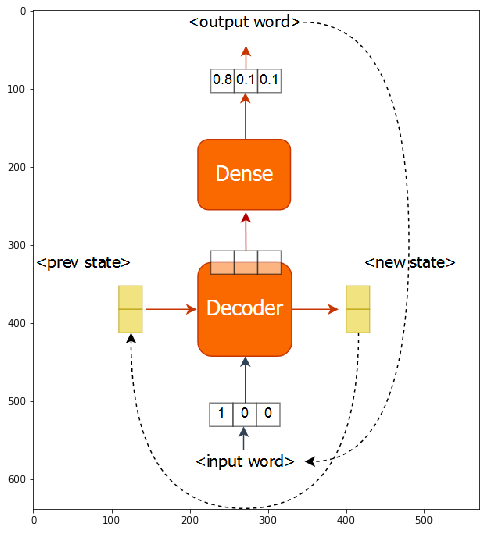

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('ch49_recursive_decoder.png')
fig= plt.figure(figsize=(8,10))
plt.imshow(img)

In [0]:
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
# Define an input layer that accepts a single onehot encoded word
de_inputs = layers.Input(shape=(1, fr_vocab))
# Define an input to accept the t-1 state
de_state_in = layers.Input(shape=(hsize,))
de_gru = layers.GRU(hsize, return_state=True)
# Get the output and state from the GRU layer
de_out, de_state_out = de_gru(de_inputs, initial_state=de_state_in)
de_dense = layers.Dense(fr_vocab, activation='softmax')
de_pred = de_dense(de_out)

# Define a model
decoder = Model(inputs=[de_inputs, de_state_in], outputs=[de_pred, de_state_out])
print(decoder.summary())

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 1, 250)]     0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 64)]         0                                            
__________________________________________________________________________________________________
gru_17 (GRU)                    [(None, 64), (None,  60480       input_14[0][0]                   
                                                                 input_15[0][0]                   
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 250)          16250       gru_17[0][0]              

####Link between the trained and inference model
Here you will be transferring the trained weights from the trained model to the inference model. In the encoder decoder model, there are three layers with parameters. They are,

- The encoder `GRU` layer
- The decoder `GRU` layer
- The decoder `Dense` layer

The other layers, such as `TimeDistributed` do not have any parameters, thus don't require the copying of weights.

In [0]:
tr_en_gru = GRU

For this exercise, you have been provided with 

1. the trained encoder `GRU` layer (`tr_en_gru`), 
2. trained decoder `GRU` (`tr_de_gru`) and 
3. the trained `Dense` layer (`tr_de_dense`). 

You also have access to all the layers of the inference model (including the encoder) such as the encoder `GRU` layer (`en_gru`), decoder `GRU` (`de_gru`) and the `Dense` layer (`de_dense`).

In [0]:
# [model not available]
# Load the weights to the encoder GRU from the trained model
en_gru_w = tr_en_gru.get_weights()
# Set the weights of the encoder GRU of the inference model
en_gru.set_weights(en_gru_w)
# Load and set the weights to the decoder GRU
de_gru.set_weights(tr_de_gru.get_weights())
# Load and set the weights to the decoder Dense
de_dense.set_weights(tr_de_dense.get_weights())

####Generating translations
You will now be generating French translations using an inference model trained using Teacher Forcing.

In [0]:
def word2onehot(tokenizer, word, vocab_size):
    de_seq = tokenizer.texts_to_sequences([[word]])
    de_onehot = to_categorical(de_seq, num_classes=vocab_size)
    de_onehot = np.expand_dims(de_onehot, axis=1)    
    return de_onehot

In [0]:
def probs2word(probs, tok):
    wid = np.argmax(probs[0,:], axis=-1)
    w = tok.index_word[wid]
    return w

This model (`nmt_tf`) has been trained for 50 epochs on 100,000 sentences which achieved around 98% accuracy on a 35000+ validation set. It might take longer for this exercise to initialize as the trained model needs to be loaded.

In [0]:
# not available

In [0]:
en_sent = ['the united states is sometimes chilly during december , but it is sometimes freezing in june .']
print('English: {}'.format(en_sent))
en_seq = sents2seqs('source', en_sent, onehot=True, reverse=True)
# Predict the initial decoder state with the encoder
de_s_t = encoder.predict(en_seq)
de_seq = word2onehot(fr_tok, 'sos', fr_vocab)
fr_sent = ''
for i in range(fr_len):    
  # Predict from the decoder and recursively assign the new state to de_s_t
  de_prob, de_s_t = decoder.predict([de_seq,de_s_t])
  # Get the word from the probability output using probs2word
  de_w = probs2word(de_prob, fr_tok)
  # Convert the word to a onehot sequence using word2onehot
  de_seq = word2onehot(fr_tok, de_w, fr_vocab)
  if de_w == 'eos': break
  fr_sent += de_w + ' '
print("French (Ours): {}".format(fr_sent))
print("French (Google Translate): les etats-unis sont parfois froids en décembre, mais parfois gelés en juin")

### Using word embedding for machine translation


####Measuring word vector similarity


In [0]:
cat_vector = np.array([[ 0.39394888, -0.26333705,  0.08621896,  0.01091912, -0.32225883,
        -0.10658745, -0.25810188,  0.35068503, -0.21361879,  0.04625478,
         0.27992395,  0.34801784, -0.16187142, -0.52442133,  0.305441  ,
         0.2697149 ,  0.13099045, -0.13699648,  0.22602458,  0.4918219 ,
        -0.321026  ,  0.0057017 , -0.04981493, -0.02993789,  0.29878485,
        -0.3817054 , -0.05704023, -0.23727393,  0.08146162, -0.40114117,
         0.15975171,  0.23145257,  0.3185359 , -0.18709224, -0.2787781 ,
         0.21370722,  0.00497514,  0.04430564, -0.02908332, -0.17749819,
        -0.30718255, -0.25935414,  0.10115459,  0.01766969, -0.16098014,
         0.3519572 , -0.0734664 , -0.3723043 ,  0.37262923, -0.34300864,
        -0.07277397, -0.00659163,  0.23748   ,  0.13399196,  0.5749845 ,
         0.18539067,  0.20504089, -0.3285161 ,  0.12926023, -0.3795821 ,
         0.3177269 ,  0.03064232,  0.1554114 , -0.00926715,  0.02937708,
         0.16277929,  0.392671  ,  0.53800666, -0.45575112,  0.38556987,
         0.06706808, -0.3802721 ,  0.03560793, -0.46856695, -0.2644591 ,
        -0.14335115,  0.10971718, -0.06499432,  0.26991028, -0.32314897,
        -0.07378025,  0.3670569 ,  0.15895942,  0.4204117 ,  0.00254397,
        -0.31696656,  0.04942322,  0.1372362 ,  0.4173302 , -0.29748875,
        -0.0426416 ,  0.2565474 , -0.3946782 ,  0.0325617 ,  0.15673377,
         0.38802406]])

In [0]:
dog_vector = np.array([[ 0.3996625 , -0.30058518,  0.04715299, -0.05910603, -0.11148381,
         0.1093993 ,  0.01090461,  0.23533289,  0.23022532, -0.10736388,
         0.27194744,  0.0234511 , -0.31267357, -0.3329223 ,  0.5383476 ,
         0.01967983, -0.01314637, -0.47769648,  0.21548632,  0.09172583,
        -0.21391751,  0.06045289, -0.33278054, -0.03726481,  0.3942353 ,
        -0.22838424, -0.14873335, -0.2946241 , -0.30747628,  0.01201936,
         0.3984858 ,  0.17620644,  0.4095585 , -0.27740127, -0.01438677,
        -0.12329695, -0.04173272, -0.10615015, -0.07224224, -0.48236308,
        -0.53165466, -0.22681382, -0.04323539,  0.36861056,  0.12315456,
         0.11744846,  0.10699135, -0.23141243,  0.61972225, -0.3322037 ,
        -0.33399817,  0.14830801,  0.5658622 , -0.11296458,  0.16682227,
        -0.09137795,  0.10273071, -0.25096542,  0.29488757, -0.2795514 ,
         0.30368486, -0.27580926, -0.14012972, -0.24056736,  0.24908563,
         0.14914584, -0.11725031,  0.24276581, -0.00545608,  0.45917222,
         0.03866611, -0.38174465, -0.36502177, -0.4143763 , -0.1863586 ,
        -0.45668072,  0.3324825 ,  0.12192825,  0.47594503, -0.18364649,
         0.42104712, -0.01100355, -0.18209179,  0.28632256, -0.00409962,
        -0.394309  , -0.00906276, -0.23715773,  0.3950311 , -0.5642396 ,
         0.42861956, -0.46919912, -0.3660173 , -0.05302884,  0.11614416,
         0.03718512]])

In [0]:
window_vector = np.array([[ 0.13325554,  0.14915967, -0.30721307,  0.09023898, -0.14277737,
        -0.3429877 ,  0.6591184 ,  0.22567806,  0.50057876, -0.14418888,
         0.7266859 ,  0.31579646, -0.04160513,  0.21206841,  0.53187066,
         0.04340999, -0.2023547 , -0.28836393, -0.03026843,  0.09326456,
        -0.15379508,  0.41042185, -0.3575508 ,  0.33814973, -0.03736347,
        -0.5686376 , -0.35828388, -0.09262004, -0.04406314, -0.30181015,
         0.02286413,  0.30441186,  0.05470408, -0.71816754,  0.13778108,
        -0.16295761,  0.09613513, -0.55940634, -0.57205784, -0.7506126 ,
        -0.31361568,  0.13012886,  0.57220346, -0.13439907, -0.22363257,
         0.42024654,  0.01096254, -0.2432713 ,  0.5192242 ,  0.28016105,
        -0.4941133 ,  0.39157686,  0.119226  , -0.35288376,  0.05466123,
        -0.0957669 , -0.0585629 ,  0.20194787, -0.03544503,  0.12973273,
         0.12909019,  0.03881926,  0.41618073, -0.31265515,  0.40158305,
         0.16749044, -0.25229704, -0.18045057, -0.11000848,  0.3967997 ,
         0.71698666, -0.7267666 , -0.08943647, -0.90438217, -0.07253361,
         0.00425288,  0.12160529,  0.02097287,  0.23188019, -0.22092348,
        -0.07865301,  0.27505714, -0.38818485, -0.37019807,  0.3313728 ,
        -0.03597212,  0.12701605, -0.7077018 ,  0.7482011 ,  0.24647832,
        -0.46840447, -0.314954  , -0.85316503, -0.2805526 , -0.08966991,
         0.5265477 ]])

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

# Print the length of the cat_vector
print('Length of the cat_vector: ', cat_vector.size)

# Compute and print the similarity between cat and window vectors
dist_cat_window = cosine_similarity(cat_vector, window_vector)
print('Similarity(cat, window): ', dist_cat_window)

# Compute and print the similarity between cat and dog vectors
print('Similarity(cat,dog): ', cosine_similarity(cat_vector, dog_vector))

Length of the cat_vector:  96
Similarity(cat, window):  [[0.32330843]]
Similarity(cat,dog):  [[0.60183563]]


####Defining the embedding model

You will be defining a Keras model that:

- Uses `Embedding` layers
- Will be trained with Teacher Forcing

This model will have two embedding layers; an encoder embedding layer and a decoder embedding layer. Furthermore, as the model is trained using Teacher Forcing, it will use a sequence length of `fr_len-1` in the decoder `Input` layer.



In [0]:
from tensorflow.python.keras.layers.embeddings import Embedding

In [0]:
# Define an input layer which accepts a sequence of word IDs
en_inputs = Input(shape=(en_len,))
# Define an Embedding layer which accepts en_inputs
en_emb = Embedding(en_vocab, 96, input_length=en_len)(en_inputs)
en_out, en_state = GRU(hsize, return_state=True)(en_emb)

de_inputs = Input(shape=(fr_len-1,))
# Define an Embedding layer which accepts de_inputs
de_emb = Embedding(fr_vocab, 96, input_length=fr_len-1)(de_inputs)
de_out, _ = GRU(hsize, return_sequences=True, return_state=True)(de_emb, initial_state=en_state)
de_pred = TimeDistributed(Dense(fr_vocab, activation='softmax'))(de_out)

# Define the Model which accepts encoder/decoder inputs and outputs predictions 
nmt_emb = Model([en_inputs, de_inputs], de_pred)
nmt_emb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
for ei in range(3):
  for i in range(0, train_size, bsize):    
    en_x = sents2seqs('source', tr_en[i:i+bsize], onehot=False, reverse=True)
    # Get a single batch of French sentences with no onehot encoding
    de_xy = sents2seqs('target', tr_fr[i:i+bsize], onehot=False)
    # Get all words except the last word in that batch
    de_x = de_xy[:,:-1]
    de_xy_oh = sents2seqs('target', tr_fr[i:i+bsize], onehot=True)
    # Get all words except the first from de_xy_oh
    de_y = de_xy_oh[:,1:,:]
    # Training the model on a single batch of data
    nmt_emb.train_on_batch([en_x, de_x], de_y)    
    res = nmt_emb.evaluate([en_x, de_x], de_y, batch_size=bsize, verbose=0)
    print("{} => Loss:{}, Train Acc: {}".format(ei+1,res[0], res[1]*100.0))

1 => Loss:5.4861226081848145, Train Acc: 0.9333333000540733
1 => Loss:5.459052085876465, Train Acc: 100.0
1 => Loss:5.4310994148254395, Train Acc: 100.0
1 => Loss:5.402021408081055, Train Acc: 100.0
2 => Loss:5.371136665344238, Train Acc: 100.0
2 => Loss:5.338072299957275, Train Acc: 100.0
2 => Loss:5.3019185066223145, Train Acc: 100.0
2 => Loss:5.262421607971191, Train Acc: 100.0
3 => Loss:5.218705177307129, Train Acc: 100.0
3 => Loss:5.170106410980225, Train Acc: 100.0
3 => Loss:5.115215301513672, Train Acc: 100.0
3 => Loss:5.053520202636719, Train Acc: 100.0
